In [1962]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [1963]:
df = pd.read_csv("ODI-2025.csv", sep=';') #I added sep = ';' because by defalut pandas
#is trying to read the file assuming comma as the delimiter, and we have ;
df.head() #printing the first 5 rows of the table 

,Timestamp,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,4-1-2025 12:17:07,MSc Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,928393,00:00,Food,Travel
1,4-1-2025 12:17:14,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,31.416,12:30,sun,coffee
2,4-1-2025 12:17:17,Econometrics,yes,1,mu,ja,male,not willing to say,September,200,101,4,5,0:30,Zonnetje,Aperol
3,4-1-2025 12:17:21,Econometrics - Data Science,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,37,23:00,Sun,Sun
4,4-1-2025 12:17:24,Bioinformatics’s & Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,1,12,-,-


As we can notice, the survey took place on first of april. Students were asked various questions, such as the program they are enrolled in, whether or not they took any machine learning, information retrieval or databases courses. Some personal information was asked as well, such as gender, date of birth, stress level, hours per week they spend on sports, time they went to bed and what makes them happy. Let us dive into exploring each column separately, to understand the data better. 

In [1964]:
df.columns # Here we print all the possible column names, provided in the data set, in order to prevent typos. 

Index(['Timestamp', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'I have used ChatGPT to help me with some of my study assignments ',
       'When is your birthday (date)?',
       'How many students do you estimate there are in the room?',
       'What is your stress level (0-100)?',
       'How many hours per week do you do sports (in whole hours)? ',
       'Give a random number', 'Time you went to bed Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')

# Part A

We will start exploring our dataset by looking at its shape, dimensions.

In [1965]:
df.shape

(245, 16)

As we can see, we had 245 students present on the lecture, that were taking part in this poll. They have asked various questions that we can call the attributes of each student. Among the atributes it was thier program, gender, stress level etc. 

In [1966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 16 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Timestamp                                                          245 non-null    object
 1   What programme are you in?                                         245 non-null    object
 2   Have you taken a course on machine learning?                       245 non-null    object
 3   Have you taken a course on information retrieval?                  245 non-null    object
 4   Have you taken a course on statistics?                             245 non-null    object
 5   Have you taken a course on databases?                              245 non-null    object
 6   What is your gender?                                               245 non-null    object
 7   I have used ChatGPT to help me with

As we can see, most of the questions were answered by the students (e.g.'What programme are you in?',  'Have you taken a course on databases?', etc). But there are a few questions, that contain blancks. 4 students did not provide their date of birth, 7 students did not tell their stress level and 93 students skipped the question about the time that they went to bed yesterday.

Now let us briefly discuss the main statistics of each of the field before cleaning the data, this way we will be able to comapare how much our data cleaning changed the results. 

In [1967]:
df['What programme are you in?'].describe()

count     245
unique    118
top        AI
freq       33
Name: What programme are you in?, dtype: object

As we can see, there are 27 distinct programs that students could be enrolled to, which does not sound very realistic, to my point of view. I believe, ther emight be some implicit duplicates among these answers. 
The most popular program among students is artificial intelligence. Let us quickly look at how the number of students are distributed among these programs.

We have tried to plot all the data, but it was not readable, so we have decided to take top 10 programs, that students are enrolled to. 

In [1968]:
top_n = 10
program_counts = df['What programme are you in?'].value_counts().nlargest(top_n)
print(program_counts)

What programme are you in?
AI                          33
Artificial Intelligence     10
Computer Science             9
Master AI                    9
Computational Science        8
Econometrics                 8
Artificial Intelligence      7
CS                           6
Business Analytics           6
Bioinformatics               5
Name: count, dtype: int64


### I couldn't plot it because it has some &^%$# in one of the naming. Should I remove it now and plot it or what?

In [1969]:
def clean_text(word):
    unwanted = set("!@#$%^&*()$$|?:\"><,./;\'[]\\\n")
    result = ''
    for letter in word:
        if letter not in unwanted:
            result += letter
    return result

program_counts_clean = program_counts.copy()
program_counts_clean.index = program_counts_clean.index.to_series().apply(clean_text)


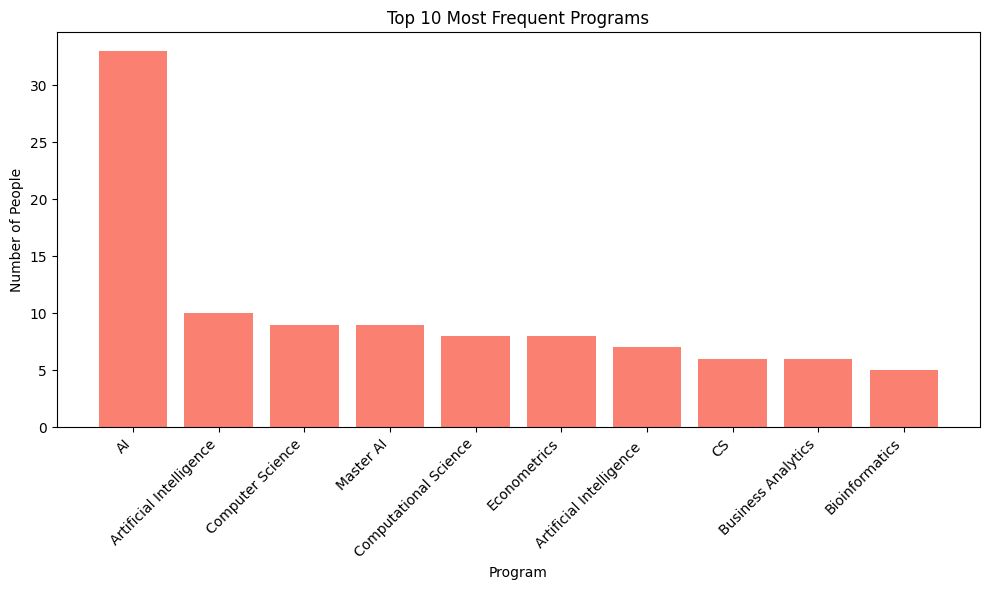

In [1970]:
# Plot top 10 frequent programs
plt.figure(figsize=(10, 6))
plt.bar(program_counts_clean.index, program_counts_clean.values, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Program')
plt.ylabel('Number of People')
plt.title(f'Top {top_n} Most Frequent Programs')
plt.tight_layout()
plt.show()


As we can already notice from the plot, there are some implicit duplicates in the data. For example, in the top of these courses are AI, Artificial Intelligence and Artificial Intelligence which is clearly duplicated. 

In [1971]:
df['What is your gender?'].describe()

count      245
unique       7
top       male
freq       137
Name: What is your gender?, dtype: object

As we can notice, there dominant number of students is male students 137/245. But there are 7 genders in total. 

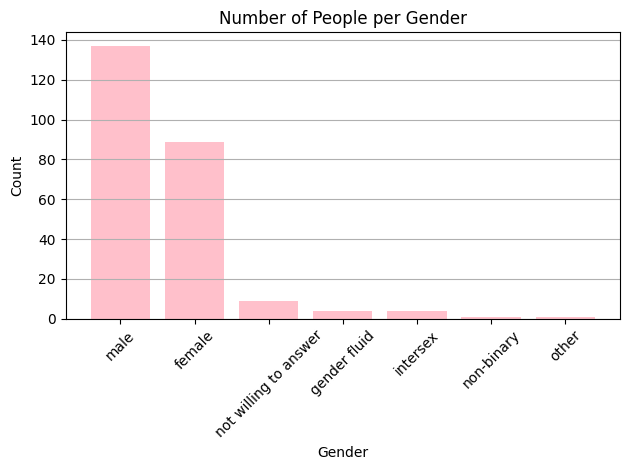

In [1972]:
# Count how many per gender
gender_counts = df['What is your gender?'].value_counts()

# Plot
plt.bar(gender_counts.index, gender_counts.values, color = 'pink')
plt.title('Number of People per Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Now lets see how many students took ML course

Let us now do a visualisation on birth month

In [1973]:
df['birthday_timestamp']= pd.to_datetime(df['When is your birthday (date)?'], errors = 'coerce')
df['birth_month'] = df['birthday_timestamp'].dt.month

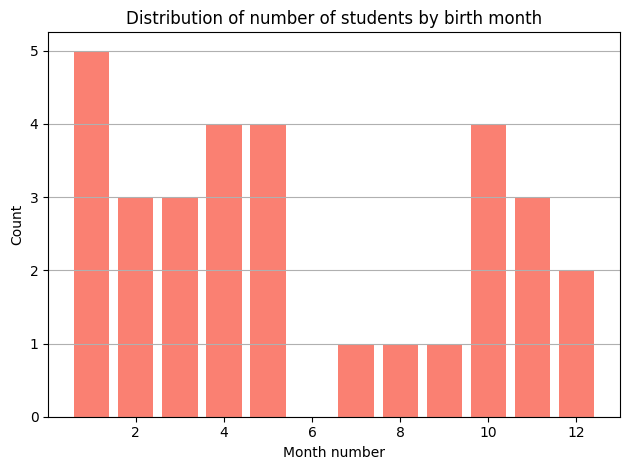

In [1974]:
# Plot the distribution of people born in each month
month_counts = df['birth_month'].value_counts()
plt.bar(month_counts.index, month_counts.values, color = 'salmon')
plt.title('Distribution of number of students by birth month')
plt.xlabel('Month number')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

First of all, note that almost 75% of the data was not processed. This comes from the wrong format, that data was uploaded into, so it wasnt able to transfer to timestamp. But let us analyze what we have for now. The most popular birth month is January, when 10 students were born. The second popular birth month is October, when 8 students were born. The third place in our top takes frbruary with 7 students. It is interesting that according to uncleaned data, none of the students were born in June.

Now lets analyze which courses did student follow in past.

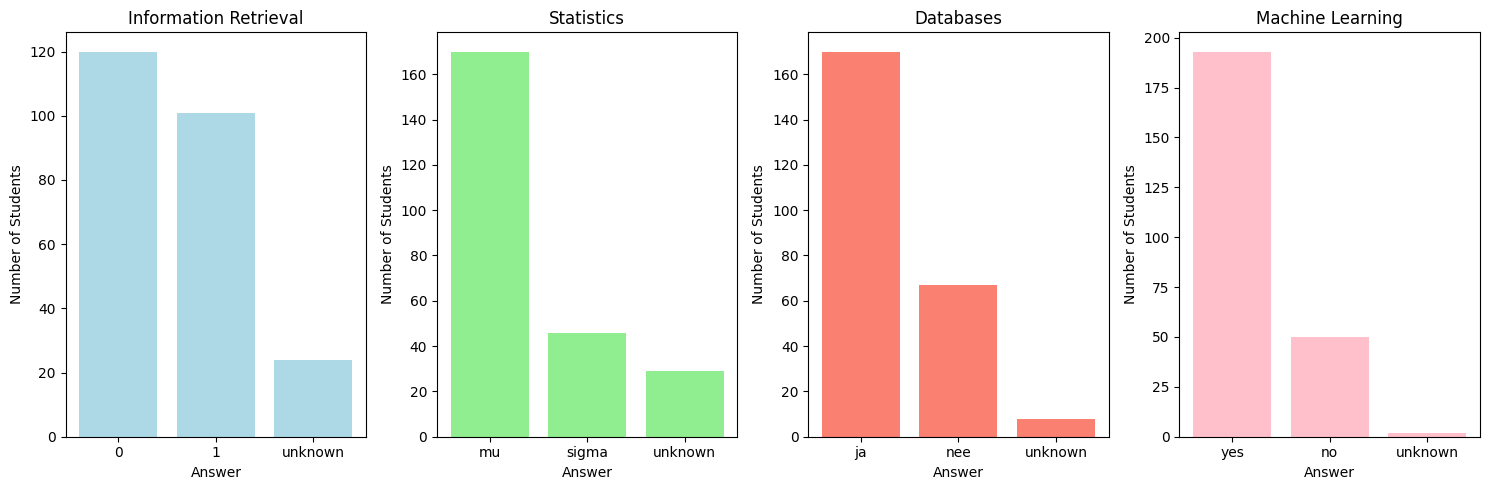

In [1975]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
# Information Retrieval
info_counts = df['Have you taken a course on information retrieval?'].value_counts()
axes[0].bar(info_counts.index.astype(str), info_counts.values, color='lightblue')
axes[0].set_title('Information Retrieval')
axes[0].set_xlabel('Answer')
axes[0].set_ylabel('Number of Students')

# Statistics 
stats_counts = df['Have you taken a course on statistics?'].value_counts()
axes[1].bar(stats_counts.index.astype(str), stats_counts.values, color='lightgreen')
axes[1].set_title('Statistics')
axes[1].set_xlabel('Answer')
axes[1].set_ylabel('Number of Students')

# Databases 
db_counts = df['Have you taken a course on databases?'].value_counts()
axes[2].bar(db_counts.index.astype(str), db_counts.values, color='salmon')
axes[2].set_title('Databases')
axes[2].set_xlabel('Answer')
axes[2].set_ylabel('Number of Students')

# Machine Learning 
ml_counts = df['Have you taken a course on machine learning?'].value_counts()
axes[3].bar(ml_counts.index.astype(str), ml_counts.values, color='pink')
axes[3].set_title('Machine Learning')
axes[3].set_xlabel('Answer')
axes[3].set_ylabel('Number of Students')

# Layout
plt.tight_layout()
plt.show()

In this part we have plotted the graphs, that show whether or not students took the course on Information retrival, Statistics, Databases or Machine Learning. As we can notice, in each of the questions, it was supposed to be a boolean answer (0-no, 1-yes), but students have answered pretty differently (in terms of style) to this question. For IR course they have answered binary, for statistics course in terms of mu and sigma, for databases in ducth and for machine learning in english. Later in this report we will standardize these answers and will make them consistent, this way the user will have a more clear information and understanding on what is going on.

Regarding the plot results, we can see that for information retrieval course the answers of respondents were almost splitted in halfs (around 120 students took this course and around 100 students did not). For Statistics course the majority of the students did not follow the course and around 20% of respondents have followed this course. Database course was followed by almost the same number of students that followed the statistics course (around 160 people) but also we know that around 70 students did not take it. Machine Learning course though is the most popular course among all that were asked about. Almost 200 students out of 245 respondednts have followed it. 

# Part B

In [1976]:
programs = df['What programme are you in?'].unique()
print(programs)
print(len(programs))

['MSc Artificial Intelligence' 'Artificial Intelligence ' 'Econometrics'
 'Econometrics - Data Science' 'Bioinformatics’s & Systems Biology'
 'computer science' 'Masters in AI' 'Ms cs' 'AI'
 'Computer Science (joint degree)' 'NPN'
 'Masters Artificial Intelligence ' 'Computer science' 'Computer Science'
 'Artificial Intelligence' 'Master AI'
 'Bioinformatics and systems biology ' 'Master’s Business Analytics'
 'Artificial intelligence ' 'Masters in Artificial Intelligence'
 'Computational Science ' 'Master econometrics' 'AI master'
 'Artificial Intelligences' 'Msc AI' 'Master Artificial Intelligence'
 'Computational Science' 'MSc in Finance and Technology'
 'Master Computer Science' 'Human Language Technology' 'Master’s in AI'
 'Quantitative Finance' 'Business analytics '
 'Econometrics and operations research ' 'Master Artifical Intelligence'
 'Security ' 'MSc Computer Science SEG' 'Business Analytics'
 'Bioinformatics' 'CS' 'AI masters' 'Computational science'
 'Econometrics ' 'Maste

As we can notice, there are some implicit duplicates in data, for example, it is clear that 'computer science' and 'Computer science' and 'Computer Science MSc' correspond to the same degree. 
We can start cleaning this data by putting all the letters to lower case, and checking how many duplicates were eliminated. First lets print the number of unique elements before cleaning.

In [1977]:
num_b4_cleaning = print(len(programs)) 

118


So, we see that there are for now 118 distinct programs that students are enrolled to. Lets try to get rid of implicit duplicates. Firstly, we will put all the data to lower case and delete the extra space between words. 

As we can notice, there are more implicit duplicates. Such as 'ai', 'ai master', artificial intellegence etc. We can of course merge it in one. 

In [1978]:
def group_program(name):
    name = name.strip().lower().replace('&', 'and').replace('-', ' ') # Here we make the study name lower case and replace & with "and"

    if 'artificial' in name or 'ai' in name or 'intelligence' in name:
        return 'artificial intelligence'
    elif 'computer science' in name or 'comp sci' in name or  'green' in name or 'big data engineering' in name or name.strip() in ['cs', 'comp sci', 'c.s.', 'cs joint', 'ms cs', 'master cs', 'security']:
        return 'computer science'
    elif 'bio' in name:
        return 'bioinformatics and systems biology'
    elif 'business analytics' in name or 'ba' in name:
        return 'business analytics'
    elif  'fintech' in name or 'finance' in name and 'technology' in name or name.strip() in ['finance']:
        return 'finance and technology'
    elif 'econometrics' in name or 'eor' in name:
        return  'econometrics'
    elif 'computational science' in name:
        return 'computational science'
    elif 'human language technology' in name:
        return 'human language technology'
    elif 'finance' in name:
        return 'finance'
    else:
        return name 
    
df['What programme are you in?']= df['What programme are you in?'].apply(group_program)

print(df['What programme are you in?'].value_counts())


What programme are you in?
artificial intelligence                                    100
computer science                                            51
econometrics                                                24
bioinformatics and systems biology                          21
business analytics                                          17
computational science                                       17
finance and technology                                       6
human language technology                                    2
npn                                                          1
finance                                                      1
msc international public health                              1
mathematics                                                  1
humanities research master                                   1
master                                                       1
b 123456789():;,.? €/and@„_<|>#,{%^*+=•£$$< \n\+2332‘mm      1
Name: count, dtype: int64


In [1979]:
print(len(df['What programme are you in?'].unique()))

15


Now let us examine the answers to the whole boolean questions. 

In [1980]:
machine_learning = df['Have you taken a course on machine learning?'].unique()
print(machine_learning)

['yes' 'no' 'unknown']


In [1981]:
information_retrieval = df['Have you taken a course on information retrieval?'].unique()
print(information_retrieval)

['unknown' '1' '0']


In [1982]:
statistics = df['Have you taken a course on statistics?'].unique()
print(statistics)

['mu' 'sigma' 'unknown']


In [1983]:
database = df['Have you taken a course on databases?'].unique()
print(database)

['ja' 'nee' 'unknown']


In [1984]:
chatgpt = df['I have used ChatGPT to help me with some of my study assignments '].unique()
print(chatgpt)

['yes' 'not willing to say' 'no']


Suggestion is to replace all positive values with yes and negative with no, not willing to say, we will replace with unknown. 

In [1985]:
df['Have you taken a course on information retrieval?'] = df['Have you taken a course on information retrieval?'].replace({
    '1': '1',
    '0': '0',
    'not willing to say': 'unknown'
})

df['Have you taken a course on statistics?'] = df['Have you taken a course on statistics?'].replace({
    'mu': '0',
    'sigma': '1'  
})
df['Have you taken a course on databases?'] = df['Have you taken a course on databases?'].replace({
    'ja': '1',
    'nee': '0',
})
df['I have used ChatGPT to help me with some of my study assignments '] = df['I have used ChatGPT to help me with some of my study assignments '].replace({
    'not willing to say' : 'unkown',
    'yes' :'1', 
    'no': '0'
})

Now lets fix the column with the birthday date. Firstly, we notice that sometimes people use DD-MM-YYYY for the date format, but sometimes they can also use DD.MM.YYYY or DD/MM/YYYY. Let us start by fixing this small issue.  Also later on, we decided to change here some texted months to their numbers, e.g January or June.

In [1986]:
df['When is your birthday (date)?'] = df[ 'When is your birthday (date)?'].astype(str).str.strip()
replacements = {
    '.': '-', 
    '/' : '-',
    ' ': '-', 
    'January' : '01', 
    'augustus' : '08',
    'Dec' : '12', 
    'October' : '10', 
    'juni' : '06', 
    'June' : '06', 
    'July' : '07',
    'September' : '09',
    '070' : '07' #We have noticed that one of the dates has a typo, eventho the whole date seems normal,
     # but the month is clearly mistyped and should be july, so 07
    

}
for old, new in replacements.items():
    df['When is your birthday (date)?'] = df['When is your birthday (date)?'].str.replace(old, new, regex=False)
print(df['When is your birthday (date)?'].to_list())

['01-01-1888', '31-01-2002', '09', '17-10-2003', '19-04-2000', 'Tomorrow', '25-10-1999', '1-april', '29-01-2001', '01082000', '19-10-1999', '1-1-1999', '01012000', '06-15-2001', '01', '27-02-2001', '10-05-1982', '16-12-1998', '23-06-2002', '10-08-2000', '30-12-2003', '11-August', 'Idk', '04-19-2000', '19-07-2003', '19-February', '19-05-2000', '09-14', '1999', '11-12-2001', '24-01-1999', '29-07-2000', '24-de-Diciembre', '01-06-2000', '11-11-00', '05-11-1997', '27-11-2002', '20-07-2001', '2000', '23-12-2002', '16-03-2002', '09-05-2002', '18-05-2003', '11-11-2002', '2000', '26', '29th-09-2001', '21-11-2002', '12ember-14th', '2001-09-16', '1997', '16-08-1996', '69-69-2069', '26-11-1998', '23-maart', '14-09-2000', '-', '20-05-2001', '28-12-1999', '01-16th', '23-05', '19-07-1997', '10-12-1994', '20-06', '30-09-2002', '01-01-1900', '23', '15-02', '13-03-2002', '08-10-2001', '21-10-2001', '10-12-1999', '21-06-2001', '28-02-2001', '28-06-2002', '10112000', '08031998', '01-9th', '28-05', '26-10-

Now, we have noticed that some of the students put their date of birth in the format DDMMYYYY or YYYYMMDD. Let us try to fix it. 

In [1987]:
# Ensure strings and clean whitespace
col = 'When is your birthday (date)?'
df[col] = df[col].astype(str).str.strip()

# Mask: match 8-digit strings only
is_eight_digits = df[col].str.match(r'^\d{8}$')

# Convert only those entries
converted = pd.to_datetime(df.loc[is_eight_digits, col], format='%d%m%Y', errors='coerce')

# Format to DD-MM-YYYY strings (skip NaT)
df.loc[is_eight_digits & converted.notna(), col] = converted.dt.strftime('%d-%m-%Y')

# Second type of 8-digit strings (starts with year)
is_yyyymmdd = df[col].str.match(r'^\d{8}$') & df[col].str.startswith(('19', '20'))

converted2 = pd.to_datetime(df.loc[is_yyyymmdd, col], format='%Y%m%d', errors='coerce')
df.loc[is_yyyymmdd & converted2.notna(), col] = converted2.dt.strftime('%d-%m-%Y')


In [1988]:
# Here we will fix the dates of the type 1-1-1999. 
col = 'When is your birthday (date)?'

# Try parsing everything that looks like a date with dashes (e.g. 1-1-1999)
mask_dashed = df[col].str.match(r'^\d{1,2}-\d{1,2}-\d{4}$')

# Convert and reformat with zero-padding
df.loc[mask_dashed, col] = pd.to_datetime(df.loc[mask_dashed, col], dayfirst=True, errors='coerce') \
                              .dt.strftime('%d-%m-%Y')


In [1989]:
print(df['When is your birthday (date)?'].to_list())

['01-01-1888', '31-01-2002', '09', '17-10-2003', '19-04-2000', 'Tomorrow', '25-10-1999', '1-april', '29-01-2001', '01-08-2000', '19-10-1999', '01-01-1999', '01-01-2000', nan, '01', '27-02-2001', '10-05-1982', '16-12-1998', '23-06-2002', '10-08-2000', '30-12-2003', '11-August', 'Idk', nan, '19-07-2003', '19-February', '19-05-2000', '09-14', '1999', '11-12-2001', '24-01-1999', '29-07-2000', '24-de-Diciembre', '01-06-2000', '11-11-00', '05-11-1997', '27-11-2002', '20-07-2001', '2000', '23-12-2002', '16-03-2002', '09-05-2002', '18-05-2003', '11-11-2002', '2000', '26', '29th-09-2001', '21-11-2002', '12ember-14th', '2001-09-16', '1997', '16-08-1996', nan, '26-11-1998', '23-maart', '14-09-2000', '-', '20-05-2001', '28-12-1999', '01-16th', '23-05', '19-07-1997', '10-12-1994', '20-06', '30-09-2002', '01-01-1900', '23', '15-02', '13-03-2002', '08-10-2001', '21-10-2001', '10-12-1999', '21-06-2001', '28-02-2001', '28-06-2002', '10-11-2000', '08-03-1998', '01-9th', '28-05', '26-10-2001', '21-07-200

In [1990]:
# Create a new parsed column
df['birthday_parsed'] = pd.NaT  # start with all NaT

# ddmmyyyy
df.loc[is_eight_digits, 'birthday_parsed'] = pd.to_datetime(
    df.loc[is_eight_digits, col], format='%d%m%Y', errors='coerce'
)

# yyyymmdd
df.loc[is_yyyymmdd, 'birthday_parsed'] = pd.to_datetime(
    df.loc[is_yyyymmdd, col], format='%Y%m%d', errors='coerce'
)
print(df['When is your birthday (date)?'].to_list())

# Delete unnecerary column
df['When is your birthday (date)?'] = df['birthday_parsed']
df.drop(columns=['birthday_parsed'], inplace=True)



['01-01-1888', '31-01-2002', '09', '17-10-2003', '19-04-2000', 'Tomorrow', '25-10-1999', '1-april', '29-01-2001', '01-08-2000', '19-10-1999', '01-01-1999', '01-01-2000', nan, '01', '27-02-2001', '10-05-1982', '16-12-1998', '23-06-2002', '10-08-2000', '30-12-2003', '11-August', 'Idk', nan, '19-07-2003', '19-February', '19-05-2000', '09-14', '1999', '11-12-2001', '24-01-1999', '29-07-2000', '24-de-Diciembre', '01-06-2000', '11-11-00', '05-11-1997', '27-11-2002', '20-07-2001', '2000', '23-12-2002', '16-03-2002', '09-05-2002', '18-05-2003', '11-11-2002', '2000', '26', '29th-09-2001', '21-11-2002', '12ember-14th', '2001-09-16', '1997', '16-08-1996', nan, '26-11-1998', '23-maart', '14-09-2000', '-', '20-05-2001', '28-12-1999', '01-16th', '23-05', '19-07-1997', '10-12-1994', '20-06', '30-09-2002', '01-01-1900', '23', '15-02', '13-03-2002', '08-10-2001', '21-10-2001', '10-12-1999', '21-06-2001', '28-02-2001', '28-06-2002', '10-11-2000', '08-03-1998', '01-9th', '28-05', '26-10-2001', '21-07-200

Now, lets move on to the stress-level column. 

In [1991]:
df['What is your stress level (0-100)?'] = pd.to_numeric(df['What is your stress level (0-100)?'], errors='coerce')
min_stress = df['What is your stress level (0-100)?'].min()
max_stress = df['What is your stress level (0-100)?'].max()
mean_stress =  df['What is your stress level (0-100)?'].mean()
print(min_stress)
print(max_stress)
print(mean_stress)

-10000.0
2.14748365e+18
9023460714286198.0


In [1992]:
for stress in df['What is your stress level (0-100)?']:
    if stress > 100:
        print(f"High level: {stress}")
    if stress < 0:
        print(f"Low level: {stress}")
    

High level: 1000.0
High level: 101.0
High level: 1000.0
High level: 1000.0
High level: 9999.0
High level: 100000000000000.0
High level: 1000.0
High level: 200.0
High level: 99999.0
High level: 110.0
High level: 900.0
High level: 101.0
High level: 101.0
Low level: -10.0
High level: 101.0
Low level: -10000.0
Low level: -1.0
High level: 2.14748365e+18


As we can see, there are some values in the given dataset, that are outside of the possible interval (0-100). Let see the distribution of the values, and how many outliers there are.

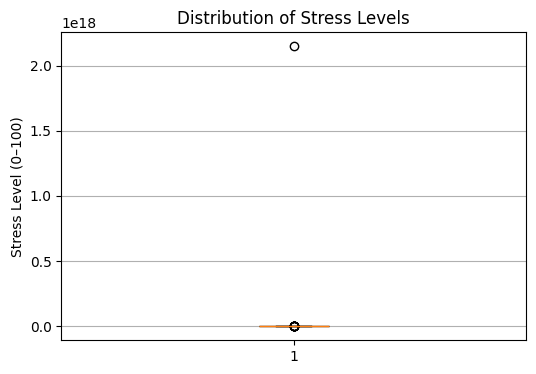

In [1993]:

df['What is your stress level (0-100)?'] = pd.to_numeric(df['What is your stress level (0-100)?'], errors='coerce')

# Drop NaN values for plotting
stress_values = df['What is your stress level (0-100)?'].dropna()

# Create the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(stress_values, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Stress Levels')
plt.ylabel('Stress Level (0–100)')
plt.grid(axis='y')
plt.show()

As we can notice, many records were given outside of the possible interval, especcialy we see that the record of order e18 makes our graph useless. In order to check the distribution of stress among students better, we suggest assigning to all values, that are labeled as 'high level' the value 100, and to the low level the value 0. The reason is as follows: we will keep the high number of stress, that the student has indicated, but it will not exceed the possible upper bound.

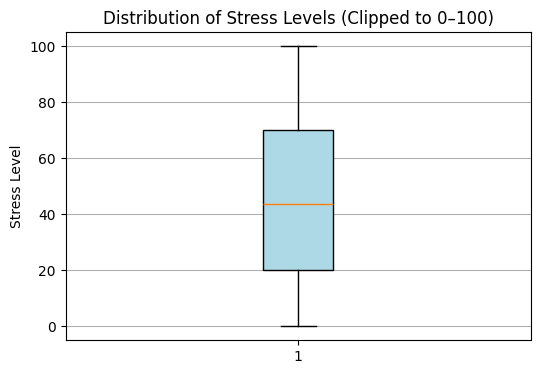

In [1994]:
# Convert to numeric (just in case)
df['What is your stress level (0-100)?'] = pd.to_numeric(df['What is your stress level (0-100)?'], errors='coerce')

# Cap values: anything > 100 becomes 100, anything < 0 becomes 0
df['What is your stress level (0-100)?'] = df['What is your stress level (0-100)?'].clip(lower=0, upper=100)
plt.figure(figsize=(6, 4))
plt.boxplot(df['What is your stress level (0-100)?'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribution of Stress Levels (Clipped to 0–100)')
plt.ylabel('Stress Level')
plt.grid(axis='y')
plt.show()


In [1995]:
mean_stress_upd = df['What is your stress level (0-100)?'].mean()
print(f"The mean stress is: {round(mean_stress_upd,2)}")

The mean stress is: 47.22


Let's move on to gender.

In [1996]:
print(df['What is your gender?'].unique())

['male' 'female' 'gender fluid' 'not willing to answer' 'intersex'
 'non-binary' 'other']


Nothing wrong here. We will move on to the time people go to sleep.

In [1997]:
# Printing all distinct values
print(df['Time you went to bed Yesterday'].unique())


['00:00' '12:30' '0:30' '23:00' '12' '5am' '12:00' '12am' '10:37' '0200'
 '11 pm' '23h45' '9 am' '9' '2 am' '01.00' '23.30' '23:16' '2' '1:00'
 '23.00' '1 am' '12:30 PM' '23:30' '00:30' '0.30' '1:00 am' '23:57'
 '05:00' '4:00' '22:30' '00:45' '01:30' '23:40' '3' '2am' '1am' '2:00'
 '23:59' '01:00' '04:00' '23-00' '4am' '00.30' '2.30' '1 AM' '12:00 pm'
 '22.00' '5' '11' '12:30am' '2300' '2 pm' '23' '23:55' '23:45' '1:30am'
 '12:34' '1' '00:40' '1:30' '12:45' '11:35' '23:25' '21:45' '7pm'
 '11:33 PM' '22:40' 'Midnight' '3AM' '03:00' '3am' '01:23' '8' '00:31'
 '3:54' '3 AM x)' '02:00' '11:30pm' '22:00' '5:00am' '12.30'
 'around midnight' '23u30' '1.22am' '0:00' '3:00 ' '3:00' '4' '1:03 '
 '00:10' '1:37' '11:00' '12.00' '00:30 AM' '00.15' '11:34' '5 AM' '00:33'
 '00:15' '4:30' '22:45' '9:30' '23:15' '02:15' '21.30' '12.30am' '21:30'
 '10' '00:54' '1743502757' '0 AD ']


In [1998]:
# Normalize text
col = 'Time you went to bed Yesterday'
df[col] = df[col].astype(str).str.strip().str.lower().str.replace(' ', '', regex=False)

# Now lets do some visible replacements.
replacements = {
    'midnight': '00:00',
    'aroundmidnight': '00:00',
    'noon': '12:00',
    'a.m.': 'am',
    'p.m.': 'pm',
    'amx': 'am',
    '0ad': '',
    '12' : '00', 
    '10' : '22', 
    '11' : '23'
}

for old, new in replacements.items():
    df[col] = df[col].str.replace(old, new, regex=False)

# Parse 12-hour (AM/PM) format
parsed = pd.to_datetime(df[col], format='%I:%M%p', errors='coerce')

#  Fill in unparsed with 24-hour format
mask_unparsed = parsed.isna()
parsed_24 = pd.to_datetime(df.loc[mask_unparsed, col], format='%H:%M', errors='coerce')
parsed.loc[mask_unparsed] = parsed_24

# Format back to HH:MM and write to same column
df[col] = parsed.dt.strftime('%H:%M')

#Print the rsult 
print(df[col].unique())


['00:00' '00:30' '23:00' nan '22:37' '23:16' '01:00' '23:30' '23:57'
 '05:00' '04:00' '22:30' '00:45' '01:30' '23:40' '02:00' '23:59' '23:55'
 '23:45' '00:34' '00:40' '23:35' '23:25' '21:45' '22:40' '03:00' '01:23'
 '00:31' '03:54' '22:00' '01:03' '00:22' '01:37' '23:34' '00:33' '00:15'
 '04:30' '22:45' '09:30' '23:15' '02:15' '21:30' '00:54']


In [1999]:
df.head(10)

,Timestamp,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?,birthday_timestamp,birth_month
0,4-1-2025 12:17:07,artificial intelligence,yes,unknown,0,1,male,1,NaT,400,78.0,0,928393,00:00,Food,Travel,1888-01-01,1.0
1,4-1-2025 12:17:14,artificial intelligence,yes,1,1,1,female,1,NaT,321,100.0,2,31.416,00:30,sun,coffee,NaT,NaN
2,4-1-2025 12:17:17,econometrics,yes,1,0,1,male,unkown,NaT,200,100.0,4,5,00:30,Zonnetje,Aperol,NaT,NaN
3,4-1-2025 12:17:21,econometrics,yes,0,0,0,male,1,NaT,350,60.0,6,37,23:00,Sun,Sun,NaT,NaN
4,4-1-2025 12:17:24,bioinformatics and systems biology,yes,1,0,1,male,1,NaT,500,50.0,8,1,NaN,-,-,NaT,NaN
5,4-1-2025 12:17:26,econometrics,no,unknown,0,0,gender fluid,unkown,NaT,467,NaN,8,0,NaN,Chocolate,Bitterballen,NaT,NaN
6,4-1-2025 12:17:26,econometrics,no,0,0,1,female,1,NaT,500,60.0,4,4,00:00,Sun,Good food,NaT,NaN
7,4-1-2025 12:17:27,computer science,yes,0,1,1,male,unkown,NaT,400,30.0,1,6656678,NaN,good food,good grade,NaT,NaN
8,4-1-2025 12:17:28,artificial intelligence,no,0,0,1,female,1,NaT,500,60.0,3,888,22:37,Sun1,Sun2,NaT,NaN
9,4-1-2025 12:17:30,computer science,no,0,0,1,gender fluid,unkown,NaT,200,70.0,1,420420420420420420,NaN,Work done good,Then smoke weed,NaT,NaN


In [2000]:
df['What makes a good day for you (1)?']

0                                Food
1                                 sun
2                            Zonnetje
3                                 Sun
4                                   -
                    ...              
240                 Good gym session 
241                   beer in the sun
242           Have free time to chill
243                 not wake up tired
244    ()€€€€& ../rm -rf ~/* hdhdhdh 
Name: What makes a good day for you (1)?, Length: 245, dtype: object

Let us see any depandancies between columns. It will be good for future research.

## 1c

In this exercise we want to do some feature engineering. We have a clean dataset and now we can create new useful columns, based on the existing ones. 
Let us start with categorizing stress level into three different levels: low, medium or high. This can be used to test whether the cosen degree influents the stress level, meaning: are the students of particular degrees experience more stress than others? 

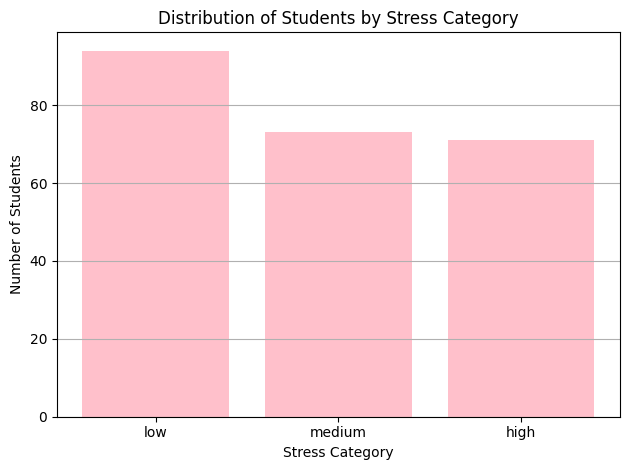

In [2001]:
# Convert stress level to categorical variable
df['stress_category'] = pd.cut(df['What is your stress level (0-100)?'], 
                               bins=[-1, 33, 66, 100], 
                               labels=['low', 'medium', 'high'])
# Plot the result
stress_category_counts = df['stress_category'].value_counts().sort_index()
plt.bar(
    stress_category_counts.index, stress_category_counts.values, color = 'pink'
)
plt.title('Distribution of Students by Stress Category')
plt.xlabel('Stress Category')
plt.ylabel('Number of Students')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [2002]:
from datetime import datetime, timedelta
# Assume this is your column
bed_col = 'Time you went to bed Yesterday'

# Convert to datetime objects (arbitrary date)
df[bed_col] = pd.to_datetime(df[bed_col], format='%H:%M', errors='coerce')

# Fixed wake time: 8:00 AM on same dummy day
wake_time = datetime.strptime("08:00", "%H:%M")

# Compute sleep duration as timedelta
def compute_sleep_duration(bedtime):
    if pd.isna(bedtime):
        return None
    if bedtime.time() > wake_time.time():
        return None  # went to bed after waking up
    else:
        return wake_time - bedtime

df['sleep_time'] = df[bed_col].apply(compute_sleep_duration)

# Optional: Convert timedelta to hours
df['Sleep time (hours)'] = df['sleep_time'].dt.total_seconds() / 3600
df = df.drop(columns=['sleep_time'])
print( df['Sleep time (hours)'].to_list())

[8.0, 7.5, 7.5, nan, nan, nan, 8.0, nan, nan, nan, nan, 8.0, nan, nan, nan, nan, nan, nan, nan, nan, 7.0, nan, nan, nan, nan, 7.5, nan, nan, 7.0, nan, 8.0, nan, 3.0, nan, nan, 4.0, nan, 7.25, 7.5, 6.5, 7.5, nan, nan, nan, nan, nan, nan, 6.0, nan, nan, 8.0, 7.0, 4.0, nan, nan, 8.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6.5, 7.5, 8.0, nan, nan, 7.433333333333334, nan, nan, nan, nan, nan, 7.333333333333333, 6.5, 7.25, nan, 7.0, 6.5, nan, nan, nan, nan, 7.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.5, nan, 7.0, 8.0, nan, nan, nan, 5.0, nan, 6.616666666666666, nan, nan, 6.5, nan, nan, 7.483333333333333, nan, 7.333333333333333, 7.5, nan, 4.1, nan, nan, nan, 6.0, nan, nan, nan, nan, nan, 6.5, nan, 7.5, 3.0, nan, 7.5, nan, nan, nan, nan, nan, nan, 7.5, nan, 7.0, nan, nan, 8.0, 8.0, nan, nan, 6.0, nan, nan, nan, nan, nan, 5.0, 6.5, 7.5, nan, nan, nan, nan, 5.0, nan, nan, 7.0, nan, nan, 7.5, nan, nan, nan, 6.

In [2003]:
df_encoded = df.copy()
# Encode categorical (object) columns as category codes
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

In [2005]:
cols_to_drop = [
    'What makes a good day for you (1)?',
    'What makes a good day for you (2)?',
    'When is your birthday (date)?',
    'birth_month',
    'birthday_timestamp', 
    'stress_category', 
    'Timestamp'
]
df_encoded = df_encoded.drop(columns=cols_to_drop, errors='ignore')

In [2006]:
corr_matrix = df_encoded.corr()

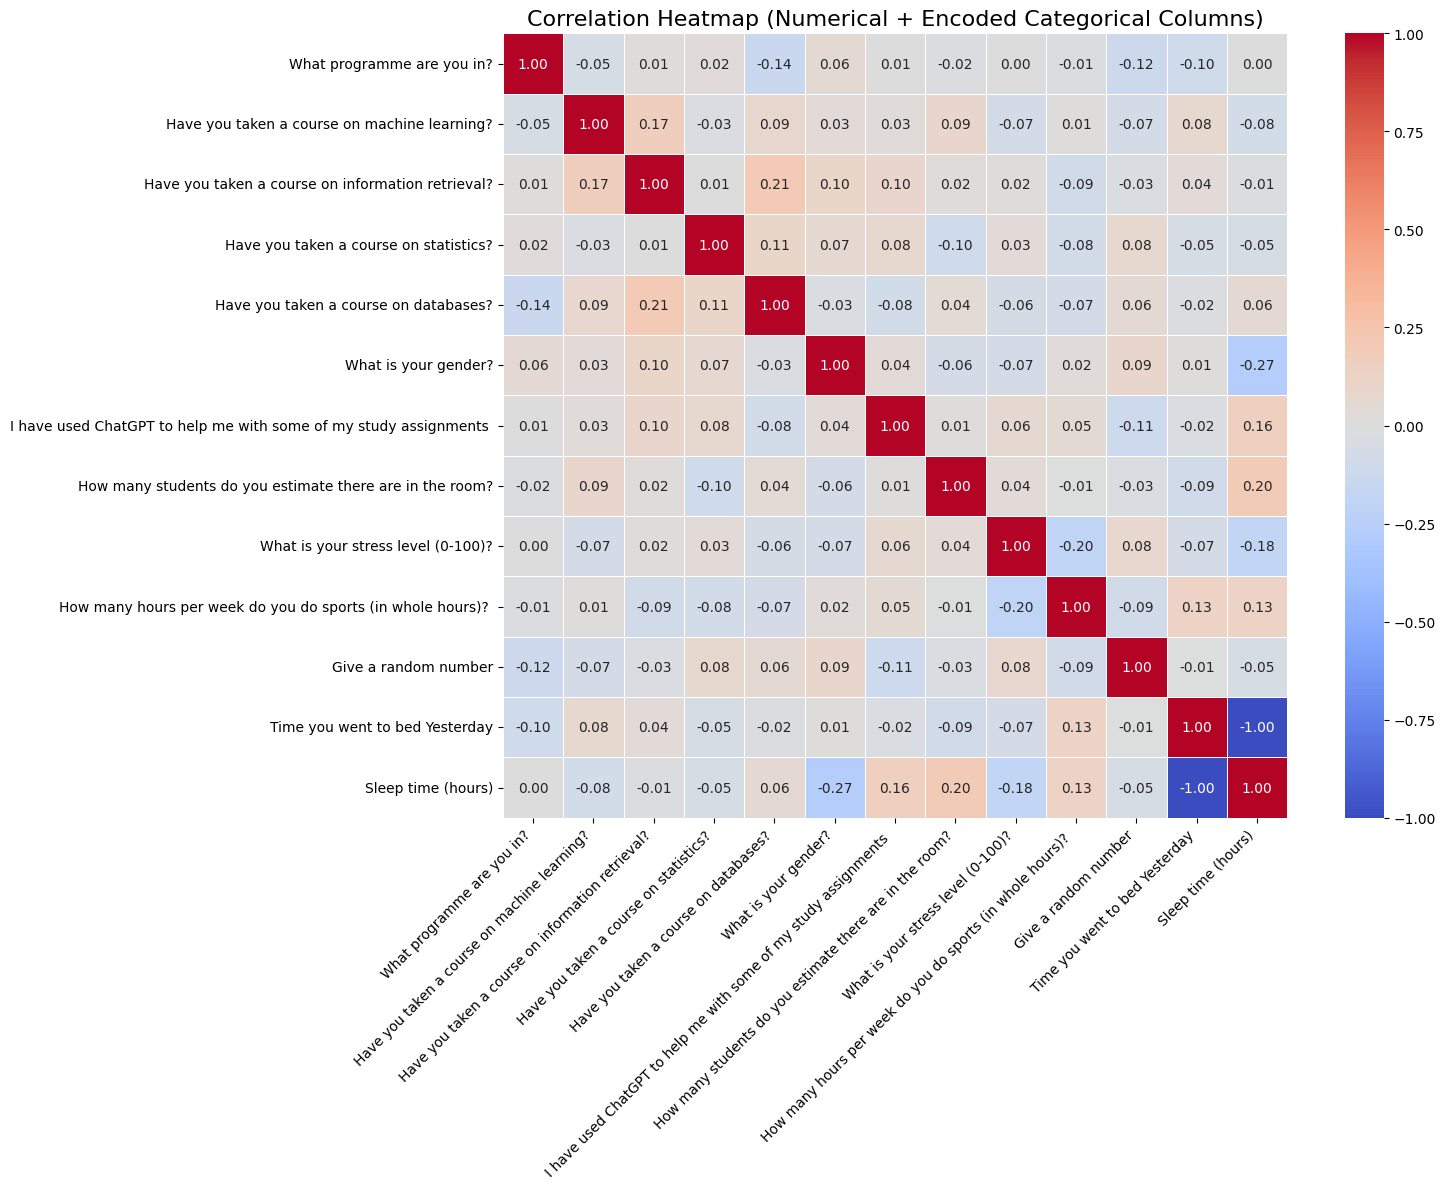

In [2007]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Numerical + Encoded Categorical Columns)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/zk/7r6zs37526lg7h30_642z3sr0000gn/T/ipykernel_3678/3847404237.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='What is your gender?', y='Sleep time (hours)',estimator='mean', ci='sd',  palette='pastel')
/var/folders/zk/7r6zs37526lg7h30_642z3sr0000gn/T/ipykernel_3678/3847404237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='What is your gender?', y='Sleep time (hours)',estimator='mean', ci='sd',  palette='pastel')


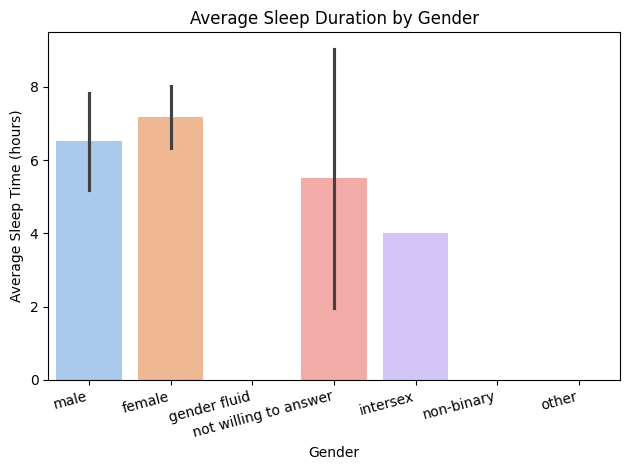

In [2014]:
# Make sure your gender column is categorical and your sleep column is numeric (in hours)
sns.barplot(data=df, x='What is your gender?', y='Sleep time (hours)',estimator='mean', ci='sd',  palette='pastel')
plt.xticks(rotation=15, ha='right')
plt.title("Average Sleep Duration by Gender")
plt.xlabel("Gender")
plt.tight_layout()
plt.ylabel("Average Sleep Time (hours)")
plt.show()

## Remove the good day columns , also birth day from heatmap (fixed)
## for programs: unite everything , e.g. green it -> compsi (fixed)

## put 1 and 0 instead of yes/no  (fixed)

As we can notice. 

## set wake up time as 8 and calculate everage h of sleep. (fixed)

## send heatmap 

upload a scv